___
# **Práctica 2 - Seminario de Sistemas 2**
___
*Christopher Iván Monterroso Alegria - 201902363*

## **Datos**
### 1. Limpieza de Datos
Primero se carga el archivo `datos.csv` con pandas y despúes se procede a la limpieza de los datos realizando las siguientes operaciones:

 1. Eliminación de filas duplicadas.
 2. Sustitución de valores nulos por 0 en la columna *`Rating`*.
 3. Sustitución de valores nulos por un string vacío en todas las columnas.
 4. Sustitución de los string vacios por None en la columna *`Level`*.
 5. Extracción de la cantidad de horas y conversión a tipo float de los valores de la columna *`Duration`* mediante la función `extraer_horas` que utiliza expresiones regulares para calcular la cantidad de horas.
 6. Eliminación de las comas y el texto "reviews" de la columna *`Review`* y conversión a tipo int.

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style

def extraer_horas(texto):
    # Patrón de expresión regular para extraer horas y minutos
    regex_horas = r'((?P<horas>\d+)(?:-(?P<horas_max>\d+))?)(?:\s*(?:hour(?:s)?|hr))?'
    regex_minutos = r'(?:(?P<minutos>\d+)(?:-(?P<minutos_max>\d+))?)(?:\s*min(?:ute)?s?)'
    regex_semanal = r'(?P<semanas>\d+)\s*week(?:s)?\s*of\s*study,\s*(?P<horas>\d+)\s*hour(?:s)?'
    regex_horas_semana_mes = r'(?P<meses_semanal>\d+)\s*months?\s*at\s*(?P<horas_semanal>\d+)\s*hour(?:s)?\s*a\s*week'

    # Buscar coincidencias en el texto usando expresiones regulares
    res_horas = re.search(regex_horas, texto, re.IGNORECASE)
    res_minutos = re.search(regex_minutos, texto, re.IGNORECASE)
    res_semanal = re.search(regex_semanal, texto, re.IGNORECASE)
    res_horas_semana_mes = re.search(regex_horas_semana_mes, texto, re.IGNORECASE)

    horas = minutos = semanas = meses = horas_semanal = 0

    # Extraer horas
    if res_horas:
        horas = int(res_horas.group('horas'))
        horas_max = res_horas.group('horas_max')
        if horas_max:
            horas_max = int(horas_max)
            horas = horas_max - horas

    # Extraer minutos
    if res_minutos:
        minutos = int(res_minutos.group('minutos'))
        minutos_max = res_minutos.group('minutos_max')
        if minutos_max:
            minutos_max = int(minutos_max)
            minutos = int(minutos_max - minutos)

    # Extraer horas semanales
    if res_semanal:
        semanas = int(res_semanal.group('semanas'))
        horas_semanal = int(res_semanal.group('horas'))

    # Extraer meses y horas semanales
    if res_horas_semana_mes:
        meses = int(res_horas_semana_mes.group('meses_semanal'))
        horas_semanal = int(res_horas_semana_mes.group('horas_semanal'))

    # Calcular horas totales
    horas_totales = 0

    if horas:
        horas_totales += horas
    if minutos:
        horas_totales += minutos / 60
    if semanas and horas_semanal:
        horas_totales = horas_semanal * 7 * semanas
    if meses and horas_semanal:
        horas_totales = horas_semanal * 4 * meses
    if "one" in texto:
        horas_totales = 1
    if "two" in texto:
        horas_totales = 2

    return horas_totales

df = pd.read_csv('Datos.csv', encoding='utf-8')
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)
# Sustituye NaN por 0 en la columna 'Rating'
df['Rating'] = df['Rating'].fillna(0)
# Sustituye NaN por '' en todas las columnas
df.fillna('', inplace=True)
# Susituye '' por None en la columna 'Level'
df['Level'] = df['Level'].replace('', None)
# Extraer las horas del texto de la columna 'Duration' y convertir a float
df["Duration"] = df["Duration"].apply(extraer_horas)
# Eliminar las comas y el texto "reviews" de la columna 'Review' y convierte a int
df['Review'] = df['Review'].str.replace(',', '').str.replace('reviews', '').replace('',0).astype(int)
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20.0,Flexible schedule,2813,,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,34.0,Flexible schedule,100,,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9.0,Flexible schedule,227,,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner level,8.0,Flexible schedule,0,,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,11.0,Flexible schedule,582,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,14.0,Flexible schedule,30,,[],"['Introducción al curso', 'Control de acceso y...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-secur...
8691,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,11.0,Flexible schedule,0,,"['Education', 'want', 'Resource', 'Causality']","['Course Orientation', 'Nested If/Else Part 1'...",['Beth Simon'],['University of California San Diego'],Social Sciences,https://www.coursera.org/learn/block-programmi...
8692,Cómo combinar y analizar datos complejos,0.0,None,9.0,Flexible schedule,0,,[],"['Estimación básica', 'Modelos', 'Vinculación ...","['Richard Valliant, Ph.D.']","['University of Maryland, College Park']",Social Sciences,https://www.coursera.org/learn/data-collection...
8693,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,19.0,Flexible schedule,0,,[],"['Introdução ao curso', 'Operações do Kubernet...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-workl...


### 2. Promedio de calificaciones por curso

In [ ]:
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean().reset_index()
promedio_calificaciones

,Course Title,Rating
0,Assisting Public Sector Decision Makers With ...,4.8
1,Atención prehospitalaria del ictus agudo y se...,4.9
2,Build a social media presence for your busine...,4.7
3,Build social awareness content for Twitter wi...,0.0
4,"Comercio, Inmigración y Tipos de Cambio en un...",4.9
...,...,...
6387,"현대 로봇공학, 강좌 2: 로봇 기구학",0.0
6388,"현대 로봇공학, 강좌 3: 로봇 동역학",0.0
6389,"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0
6390,"현대 로봇공학, 강좌 5: 로봇 매니퓰레이션 및 차륜형 이동 로봇",0.0


### 3.1. Cursos con mayor rating

In [ ]:
max_rating = df.loc[df['Rating'].idxmax(), 'Rating']
max = df.nlargest(len(df[df['Rating'] == max_rating]), 'Rating')[['Course Title','Rating']]
max

,Course Title,Rating
166,Songwriting: Writing the Music,5.0
356,Western Religions & Ecology,5.0
362,El Holocausto: el abismo de la humanidad,5.0
364,莊子─人情 (Zhuangzi─Between People),5.0
376,Exploring Beethoven’s Piano Sonatas Part 2,5.0
...,...,...
8291,Tecnologías para la Innovación Educativa,5.0
8381,Escola 4.0 Educação e Cultura Maker no Context...,5.0
8537,Activity Design with PhET Simulations for STEM...,5.0
8546,Sistemas difusos,5.0


### 3.2. Cursos con menor rating

In [ ]:
min_rating = df.loc[df['Rating'].idxmin(), 'Rating']
min = df.nsmallest(len(df[df['Rating'] == min_rating]), 'Rating')[['Course Title','Rating']]
min

,Course Title,Rating
3,Distribución digital de la música independiente,0.0
7,Становлення сучасної України,0.0
16,Create your UX portfolio with Adobe Portfolio,0.0
20,Cultura Maya en Yucatán,0.0
22,"Herencia negra, aplicación de ritmos afroperuanos",0.0
...,...,...
8689,L’engagement efficace de la société civile dan...,0.0
8691,Computational Thinking for K-12 Educators: Nes...,0.0
8692,Cómo combinar y analizar datos complejos,0.0
8693,Architecting with Google Kubernetes Engine: Wo...,0.0


 ### 4. Porcentaje de cursos con horario flexible

In [ ]:
cursos_flex =  df[df['Schedule'] == 'Flexible schedule']
porcentaje_flex = round(len(cursos_flex) / len(df) * 100, 2)
print(porcentaje_flex, "%")

92.63 %


## **Gráficos**

### 1. Número de cursos en cada nivel de dificultad.

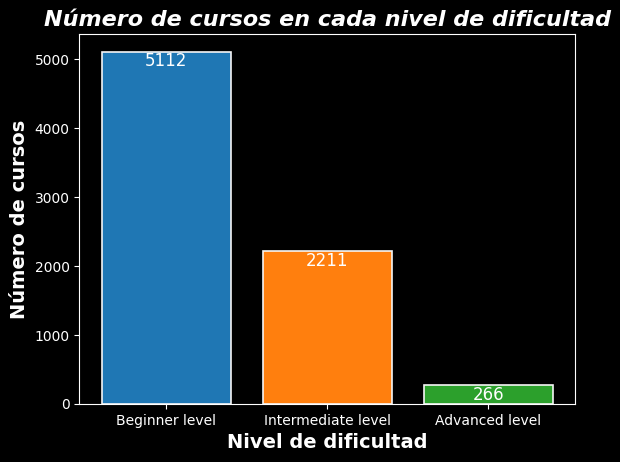

In [ ]:
# Establecer un estilo predefinido
style.use('default')
style.use('dark_background')

# Contar el número de cursos por nivel de dificultad
niveles = df["Level"].value_counts()

# Crear gráfica de barras
plt.bar(niveles.index, niveles, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], edgecolor='whitesmoke', linewidth=1.2)
# Mostrar la cantidad de datos sobre cada barra
for i, valor in enumerate(niveles):
    plt.text(i, valor, str(valor), ha='center', va='top', color="white", fontsize=12)  # Ajustar posición y estilo

plt.title('Número de cursos en cada nivel de dificultad', fontsize=16, fontstyle='italic', fontweight='bold')
plt.xlabel("Nivel de dificultad", fontsize=14, fontweight='bold')
plt.ylabel("Número de cursos",fontsize=14, fontweight='bold')
plt.show()


Como se puede observar en la gráfica el Nivel de dificultad que tiene más cursos es el `Beginner Level` con 5112 y el nivel de dificultad que tiene menos cursos es el `Advanced Level` con 266, mientras que el `Intermediate Level` tiene 2211 cursos.


### 2. Número de cursos en las principales categorías.

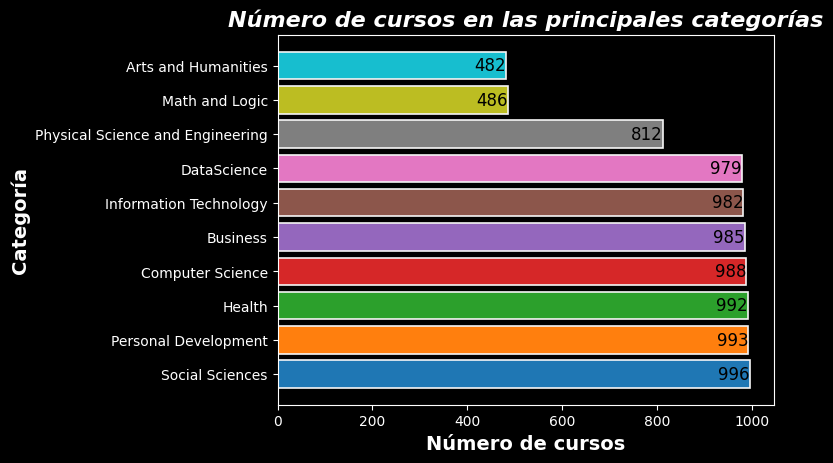

In [ ]:
# Establecer un estilo predefinido
style.use('default')
style.use('dark_background')

# Contar el número de cursos por categoría
categorias = df["Keyword"].value_counts()

# Crear gráfica de barras horizontal
plt.barh(categorias.index, categorias, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], edgecolor='whitesmoke', linewidth=1.2)
for i, valor in enumerate(categorias):
    plt.text(valor, i, str(valor), ha='right', va='center', color="black", fontsize=12)  # Ajustar posición y estilo

plt.title('Número de cursos en las principales categorías', fontsize=16, fontstyle='italic', fontweight='bold')
plt.xlabel("Número de cursos", fontsize=14, fontweight='bold')
plt.ylabel("Categoría", fontsize=14, fontweight='bold')
plt.show()

Como se puede observar en la gráfica, las siguientes 7 categorías tienen un número de cursos por arriba de 900: DataScience, Information Technology, Business, Computer Science, Health, Personal Development y Social Science, siendo la categoría de Social Sciences la categoría con más cursos. Physical Science and Engineering cuenta con 812 y las que menor cantidad de cursos tienen son Math and Logic con 486 y Arts and Humanities con 482.

### 3. Duración del curso vs. Número de revisiones.

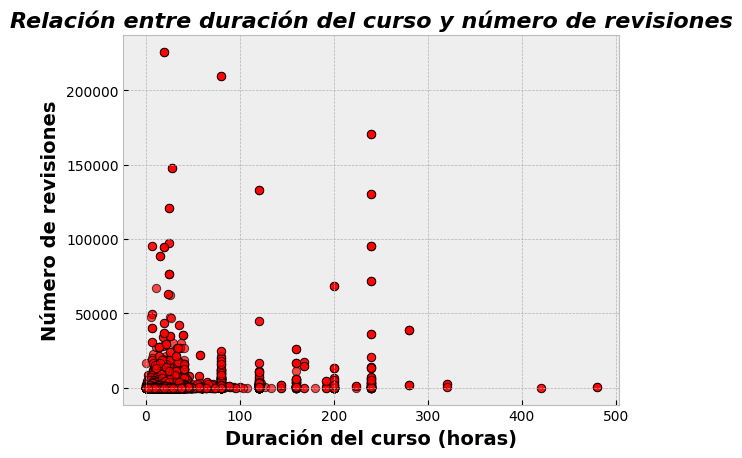

In [ ]:
# Establecer un estilo predefinido
style.use('default')
style.use('bmh')

# Crear un gráfico de dispersión
plt.scatter(df["Duration"], df["Review"], color='red', edgecolor='black', linewidth=0.7, alpha=0.7)
plt.title('Relación entre duración del curso y número de revisiones', fontsize=16, fontstyle='italic', fontweight='bold')
plt.xlabel("Duración del curso (horas)", fontsize=14, fontweight='bold')
plt.ylabel("Número de revisiones", fontsize=14, fontweight='bold')
plt.show()

En la gráfica se puede observar que la mayoria de los cursos tienen una duración de 0 a 100 horas y que el número de revisiones se concentra más en los cursos con menor duración, mientras que los cursos con mayor duración tienen poca concentración de revisiones. Aunque no se puede establecer una relación clara entre la duración del curso y el número de revisiones.

### 4. Distribución de las duraciones de los cursos

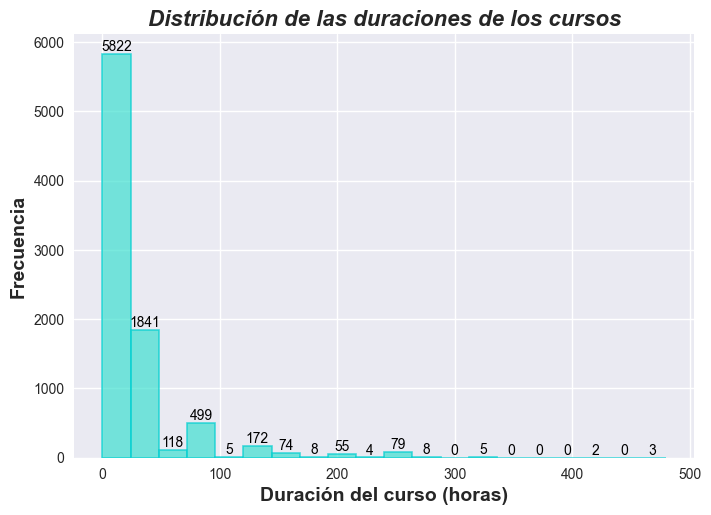

In [ ]:
# Establecer un estilo predefinido
style.use('default')
style.use('seaborn')

# Crear un histograma
n, bins, patches = plt.hist(df["Duration"], bins=20, color= 'turquoise', edgecolor='darkturquoise', linewidth=1.2, alpha=0.7)

# Mostrar la cantidad de datos en cada barra
for i, patch in enumerate(patches):
    plt.text(patch.get_x() + patch.get_width() / 2, n[i] + 0.1, str(int(n[i])), ha='center', va='bottom', color='black')

plt.title('Distribución de las duraciones de los cursos', fontsize=16, fontstyle='italic', fontweight='bold')
plt.xlabel("Duración del curso (horas)", fontsize=14, fontweight='bold')
plt.ylabel("Frecuencia", fontsize=14, fontweight='bold')
plt.show()

Se puede observar en la gráfica que la mayoría de los cursos tienen una duración entre 0 a 25 horas con una frecuencia de 5822. Al aumentar la duración la frecuencia de los cursos disminuye considerablemente, siendo la duración entre 25 a 50 horas la segunda más frecuente con 1841 cursos. Y así sucesivamente, a mayor duración menor frecuencia de cursos, aunque no se puede establecer un patrón claro.

### 5. Distribución de las calificaciones de los cursos por nivel de dificultad

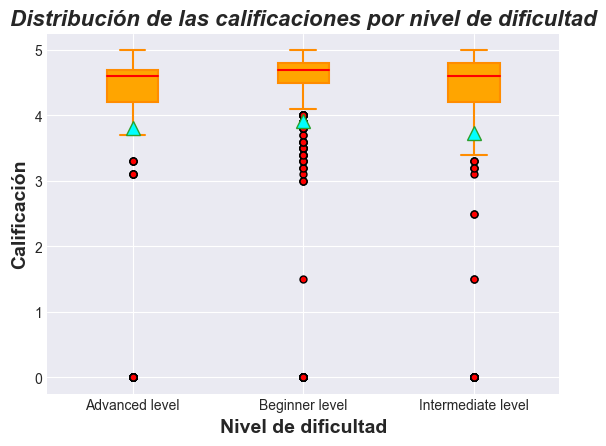

In [ ]:
# Establecer un estilo predefinido
style.use('default')
style.use('seaborn-darkgrid')


# Agrupar por nivel de dificultad y crear un gráfico de cajas
df.boxplot(column="Rating", by="Level", showmeans=True, patch_artist=True, boxprops=dict(facecolor='orange', color='darkorange', linewidth=1.5), whiskerprops=dict(color='darkorange', linewidth=1.5), capprops=dict(color='darkorange', linewidth=1.5), meanprops=dict(markerfacecolor='cyan', markersize=10), medianprops=dict(color='red', linewidth=1.5), flierprops=dict(marker='o', markerfacecolor='red', markersize=5, markeredgecolor='black'))
plt.title('Distribución de las calificaciones por nivel de dificultad',  fontsize=16, fontstyle='italic', fontweight='bold')
plt.suptitle("")
plt.xlabel("Nivel de dificultad", fontsize=14, fontweight='bold')
plt.ylabel("Calificación", fontsize=14, fontweight='bold')
plt.show()

En la gráfica se puede observar que todos la mayoría de los cursos en todos tienen una calificación alta (entre 4 y 5) independientemente del nivel de dificultad, la calificación promedio para cada nivel de dificultad es similar, rondando los 4 aproximadamente, aunque el nivel de dificultad `Intermediate Level` tiene una calificación promedio más baja que los demás, mientras que el nivel de dificultad `Beginner Level` tiene una calificación promedio más alta. También se puede observar que en cada nivel de dificultad hay calificaciones con valores atípicos, todos los niveles tienen un valor atípico de 0 y el que contiene más valores atípicos diferentes es `Beginner Level`.

## 6. Análisis de texto con NLTK y spaCy
En esta sección se realiza un análisis textual del archivo de comentarios de Coursera. Se aplican técnicas de NLP como tokenización, limpieza, stemming, lematización, análisis de sentimientos y reconocimiento de entidades nombradas.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


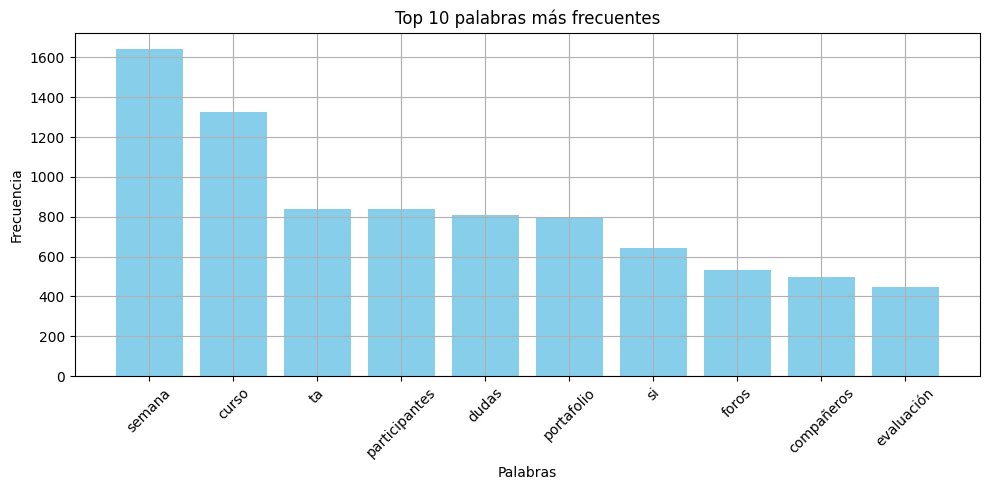

Se truncaron las últimas líneas 5000 del resultado de transmisión.
facebook → MISC
También → PER
TA → ORG
El contar con la agenda → MISC
También → PER
Un acierto fue el proponer → MISC
Facebook → MISC
TA → ORG
También → PER
La participación de los TA → MISC
Facebook → MISC
Semana 1 → MISC
Cielo Luciana → LOC
Ormachea → MISC
Posibilidad → MISC
La intensividad → MISC
La metodología del cursos → MISC
Dificultades → PER
Semana 1 → MISC
Alex        Camacho Martínez → PER
TA → ORG
Coursera → LOC
Estas gráficas → MISC
Semana 1 → MISC
Bárbara        Gómez → MISC
ningún → ORG
TAs → MISC
Fecha → MISC
MOOC → MISC
Sin embargo → MISC
MOOC → MISC
Sin embargo → MISC
png → MISC
jpg → MISC
gif → MISC
pdf → MISC
Semana 1 → MISC
KLEVER → ORG
MORALES → ORG
ID → MISC
Coursera
Haciendo → MISC
tenía información → ORG
Pero estoy seguro → MISC
Facebook → MISC
portafolio


 → MISC
Todo genial → MISC
Semana 1 → MISC
Crear → MISC
Semana 1 → MISC
TAs → MISC
Semana 1 → MISC
Elfego José         → MISC
Urízar Cabrera

In [11]:
# ===============================
# Análisis NLP - Comentarios Coursera
# ===============================
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Leer archivo de comentarios
with open('Coursera Comments.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# 1. Tokenización
tokens = word_tokenize(texto.lower(), language='spanish')

# 2. Eliminar puntuación y stopwords
stopwords_es = set(stopwords.words('spanish'))
tokens_filtrados = [w for w in tokens if w.isalpha() and w not in stopwords_es]

# 3. Stemming
stemmer = SnowballStemmer('spanish')
stems = [stemmer.stem(w) for w in tokens_filtrados]

# 4. Lematización (funciona mejor en inglés, pero lo usamos para demostrar)
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w) for w in tokens_filtrados]

# 5. Conteo de frecuencia
frecuencia = Counter(tokens_filtrados)
top_10 = frecuencia.most_common(10)

# 6. Gráfico de palabras más frecuentes
palabras, conteo = zip(*top_10)
plt.figure(figsize=(10, 5))
plt.bar(palabras, conteo, color='skyblue')
plt.title("Top 10 palabras más frecuentes")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# Análisis de Sentimientos (VADER)
# ===============================
sia = SentimentIntensityAnalyzer()
resultado_sentimiento = sia.polarity_scores(texto)
print(" Resultado del análisis de sentimiento:")
print(resultado_sentimiento)

# ===============================
# Reconocimiento de Entidades Nombradas (NER con spaCy)
# ===============================
# Instalar spaCy y el modelo en español (solo una vez)
!pip install -q spacy
!python -m spacy download es_core_news_sm

# Cargar modelo
nlp = spacy.load("es_core_news_sm")

# Increase the max_length limit
nlp.max_length = 2000000  # Increase to a value larger than your text length

# Procesar el texto
doc = nlp(texto)

print("\n Entidades nombradas encontradas:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")

## Conclusión del Análisis de Texto

En esta sección se aplicaron diversas técnicas de Procesamiento de Lenguaje Natural (NLP, por sus siglas en inglés) utilizando las librerías **NLTK** y **spaCy** para analizar un conjunto de comentarios de usuarios sobre la plataforma Coursera. A continuación, se detallan los pasos realizados y su importancia:

### Técnicas aplicadas:

- **Tokenización**: Se dividió el texto en unidades mínimas llamadas *tokens* (palabras), lo cual es fundamental para cualquier análisis textual.
- **Eliminación de stopwords**: Se eliminaron palabras comunes en español como *"el", "la", "y"*, que no aportan valor semántico relevante.
- **Stemming y Lematización**: Se redujeron las palabras a su raíz o forma base para unificar términos similares (por ejemplo: *estudiando, estudié → estudi*).
- **Conteo de frecuencia**: Se identificaron las palabras más repetidas, permitiendo conocer los temas más recurrentes en los comentarios.
- **Análisis de sentimiento (VADER)**: Se evaluó si el texto general era positivo, negativo o neutral con base en las palabras utilizadas.
- **Reconocimiento de Entidades Nombradas (NER)**: Usando spaCy, se identificaron nombres de personas, organizaciones y lugares mencionados en los comentarios.

### Significado de las etiquetas del NER:

- `PER`: Persona – nombres propios como *"Julio César", "Marcela Avitia"*
- `ORG`: Organización – instituciones o marcas como *"Coursera", "TA", "Facebook"*
- `LOC`: Lugar – ubicaciones geográficas como *"Centro de México"*
- `MISC`: Misceláneo – términos que no encajan claramente en otra categoría. Incluye fechas, eventos, nombres no convencionales, siglas, etc.


## **Conclusiones**


### **Conclusión general**:

La mayoría de los cursos en la plataforma tienen una calificación alta (entre 4 y 5), lo que sugiere que los cursos son bien recibidos por los estudiantes. Los cursos con nivel de dificultad "Beginner Level" son los más numerosos, mientras que los cursos de nivel "Advanced Level" son los menos frecuentes. Las categorías con mayor cantidad de cursos son "Social Sciences", "Data Science", "Information Technology", "Business" y "Computer Science", lo que refleja una fuerte demanda en estas áreas. No se observa una relación clara entre la duración del curso y el número de revisiones recibidas. Sin embargo, la mayoría de los cursos tienen una duración de 0 a 25 horas. La distribución de calificaciones por nivel de dificultad es similar, con una calificación promedio rondando los 4 puntos, lo que indica que los cursos son bien evaluados independientemente de su nivel de dificultad.

### **Conclusión sobre el uso de Python para el análisis de datos**:

Python, junto con la biblioteca Pandas y Matplotlib, es una herramienta poderosa para el análisis de datos y la visualización de información. La capacidad de manipular y limpiar grandes conjuntos de datos, realizar cálculos complejos y generar gráficos atractivos e informativos facilita el proceso de análisis y comprensión de los datos.

La versatilidad de Python permitió realizar operaciones como la eliminación de filas duplicadas, el manejo de valores nulos, la extracción de información de cadenas de texto mediante expresiones regulares. Además, la personalización de los gráficos con estilos específicos mejora la presentación y la comprensión de los resultados.
